In [ ]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_new=df.drop(['PassengerId', 'Pclass', 'Name', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin',],axis=1)
df_new.columns

Index(['Survived', 'Sex', 'Age', 'Embarked'], dtype='object')

In [ ]:
df_new.describe()

,Survived,Age
count,891.000000,714.000000
mean,0.383838,29.699118
std,0.486592,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


In [ ]:
df_new.isnull().sum()

Survived      0
Sex           0
Age         177
Embarked      2
dtype: int64

In [ ]:
import numpy as np
df_new['Age']=df_new['Age'].fillna(np.mean(df_new['Age']))
df_new['Embarked']=df_new['Embarked'].fillna('S')
df_new.isnull().sum()

Survived    0
Sex         0
Age         0
Embarked    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
df_new['Sex']=lb1.fit_transform(df_new['Sex'])
lb2=LabelEncoder()
df_new['Embarked']=lb1.fit_transform(df_new['Embarked'])
x=df_new.drop('Survived', axis=1)
y=df_new['Survived']
print(x)
print(y)


     Sex        Age  Embarked
0      1  22.000000         2
1      0  38.000000         0
2      0  26.000000         2
3      0  35.000000         2
4      1  35.000000         2
..   ...        ...       ...
886    1  27.000000         2
887    0  19.000000         2
888    0  29.699118         2
889    1  26.000000         0
890    1  32.000000         1

[891 rows x 3 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 3)
(712,)
(179, 3)
(179,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3,p=1)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred=clf.predict(x_test)
cm=confusion_matrix(y_test,pred)
print(cm)

[[86 19]
 [24 50]]


In [ ]:
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       105
           1       0.72      0.68      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



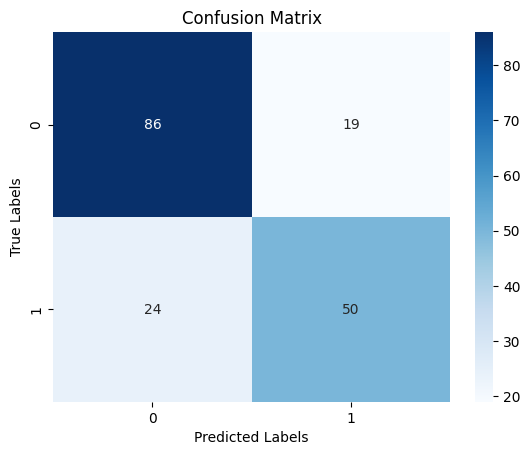

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
# sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
                'n_neighbors':[x for x in range(1,15)]
             }
grid_search=GridSearchCV(clf,parameters,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_model=grid_search.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=3, p=1)

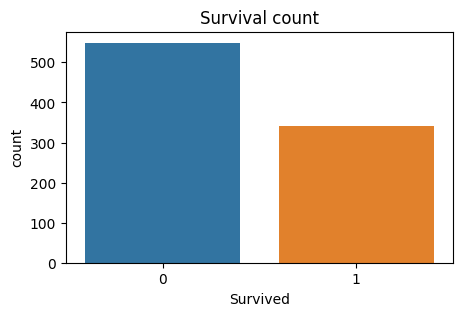

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='Survived')
plt.title('Survival count')
plt.show()

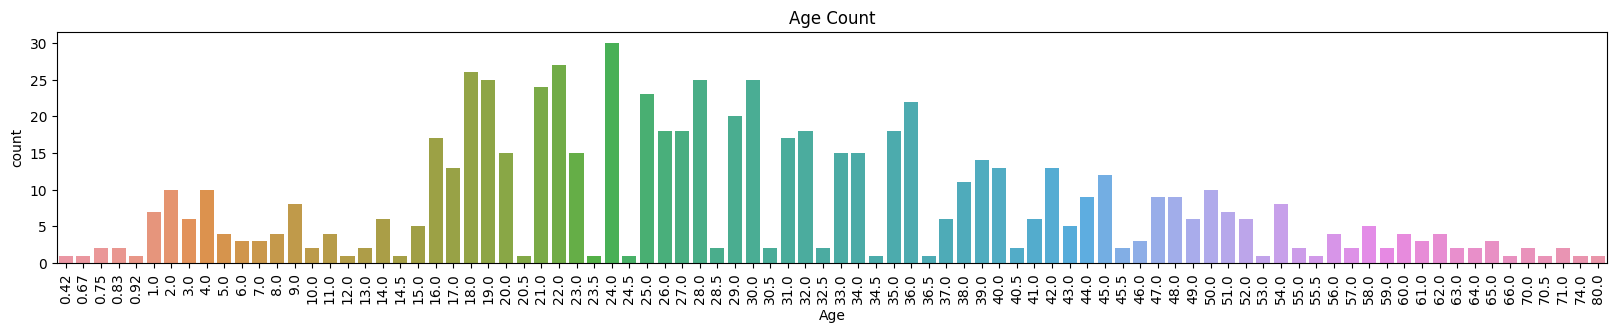

In [ ]:
fig, ax=plt.subplots(figsize=(20,3))
sns.countplot(data=df,x='Age')
plt.title('Age Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.svm import LinearSVC
clf_SVM=LinearSVC(random_state=42)
clf_SVM.fit(x_train,y_train)
pred_SVM=clf_SVM.predict(x_test)
cr_SVM=classification_report(y_test,pred_SVM)
print(cr_SVM)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       105
           1       0.80      0.64      0.71        74

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold=5
kf=KFold(n_splits=k_fold,shuffle=True, random_state=42)
score=cross_val_score(clf_SVM,x,y,cv=kf,scoring='accuracy')
# print("Cross-validation scores:", score)
# print("Mean score:", score.mean())


In [ ]:
print("Cross-validation scores:", score)
print("Mean score:", score.mean())


Cross-validation scores: [0.75418994 0.75280899 0.8258427  0.73595506 0.79775281]
Mean score: 0.7733098989391751


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={
            'C':[x/100 for x in range(10,200,5)],
            'max_iter':[x for s in range(1000,5000,1000)],
            'penalty':['l1','l2']
}
grid_search=GridSearchCV(clf_SVM,parameters,n_jobs=-1)
grid_search.fit(x_train,y_train)
best_model=grid_search.best_estimator_

ValueError: ignored

In [ ]:
bestest_model = LinearSVC(C=0.3, max_iter=10000)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier=Sequential()
classifier.add(Dense(units=128, kernel_initializer='uniform',activation='relu',input_dim=len(x.columns)))
classifier.add(Dense(units=64, kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test))


In [ ]:
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
# from keras.wrappers.scikit_learn import KerasClassifier
opt_list = [Adam(learning_rate=0.0001),Adam(learning_rate=0.0002),
            Adam(learning_rate=0.0003),Adam(learning_rate=0.0004)]
def build_classifier(optimizer):
  classifier=Sequential()
  classifier.add(Dense(units=128, kernel_initializer='uniform',activation='relu',input_dim=len(x.columns)))
  classifier.add(Dense(units=64, kernel_initializer='uniform',activation='relu'))
  classifier.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))
  classifier.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))
  classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return  classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'optimizer': opt_list}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
grid_search = grid_search.fit(x_train, y_train,verbose = 1,epochs=100)


In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)

{'optimizer': <keras.optimizers.legacy.adam.Adam object at 0x7cecae4ad8a0>}
0.7977051117896188
